In [67]:
# required imports
# %pip install yfinance cvxopt
import cvxpy as cp

import pandas as pd
import yfinance as yf
import datetime
import numpy as np
import matplotlib.pyplot as plt
import random

import yfinance as yf

### Gather 10 asset closing prices and calculate returns

In [68]:
start_date = '2022-10-30' # start date
end_date = '2024-01-30' # end date

In [69]:
tickers = ["RELIANCE.NS", "COALINDIA.NS", "KOTAKBANK.NS", "BAJAJ-AUTO.NS", "ITC.NS", "BAJAJFINSV.NS", "ADANIENT.NS", "INDUSINDBK.NS", "HEROMOTOCO.NS", "TATASTEEL.NS"] #10 risky assets
prices = yf.download(tickers, start=start_date, end=end_date)['Close']  # closing price
returns = prices.pct_change().dropna()  # calc percentage change
print(returns.shape)
returns.head()

[*********************100%%**********************]  10 of 10 completed


(307, 10)


Ticker,ADANIENT.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,COALINDIA.NS,HEROMOTOCO.NS,INDUSINDBK.NS,ITC.NS,KOTAKBANK.NS,RELIANCE.NS,TATASTEEL.NS
Date,,,,,,,,,,
2022-11-01,0.068186,0.016572,0.012770,-0.001220,-0.001382,0.007439,0.002294,0.003812,-0.007746,-0.003447
2022-11-02,0.001398,0.001098,0.000790,0.000611,-0.010923,-0.011250,0.014735,0.000393,0.006245,0.000494
2022-11-03,0.002709,0.009821,0.007659,0.001627,0.000908,0.008610,-0.002679,-0.005131,0.003732,0.007407
2022-11-04,0.067639,-0.000636,0.044793,-0.000609,-0.021709,0.004094,-0.000283,-0.000105,0.014715,0.026961
2022-11-07,0.033222,-0.000331,-0.012578,0.014225,0.012418,-0.007417,-0.000283,-0.009132,0.005342,0.018616


In [70]:
returns_log = np.log(prices / prices.shift(1)).dropna()
returns_log.head()

Ticker,ADANIENT.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,COALINDIA.NS,HEROMOTOCO.NS,INDUSINDBK.NS,ITC.NS,KOTAKBANK.NS,RELIANCE.NS,TATASTEEL.NS
Date,,,,,,,,,,
2022-11-01,0.065962,0.016436,0.012690,-0.001221,-0.001383,0.007411,0.002292,0.003805,-0.007776,-0.003453
2022-11-02,0.001397,0.001098,0.000790,0.000610,-0.010984,-0.011313,0.014628,0.000393,0.006226,0.000494
2022-11-03,0.002705,0.009773,0.007630,0.001626,0.000907,0.008573,-0.002682,-0.005144,0.003725,0.007380
2022-11-04,0.065449,-0.000636,0.043818,-0.000609,-0.021948,0.004086,-0.000283,-0.000105,0.014608,0.026604
2022-11-07,0.032683,-0.000332,-0.012658,0.014125,0.012342,-0.007445,-0.000283,-0.009174,0.005328,0.018445


### Visualising returns

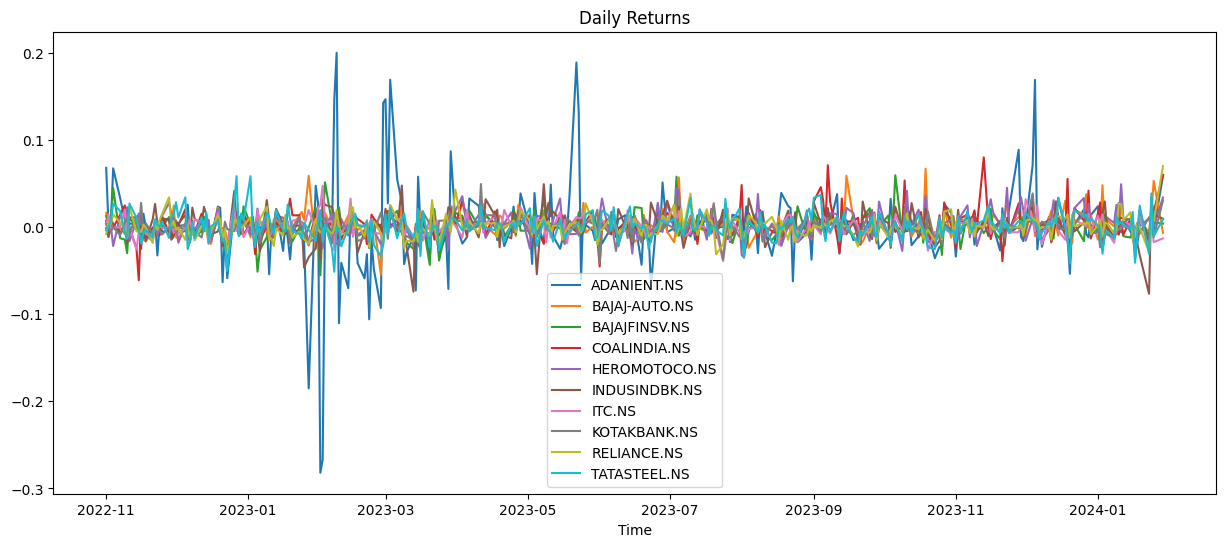

In [71]:
plt.figure(figsize=(15,6))
for col in returns.columns:
  plt.plot(returns[col], label=col)
plt.title("Daily Returns")
plt.xlabel("Time")
plt.legend()
plt.show()

### Markowitz's Optimisation and Frontier

In [72]:
# calc mean of assets
mu = returns.mean()
mu

Ticker
ADANIENT.NS      0.000717
BAJAJ-AUTO.NS    0.002443
BAJAJFINSV.NS   -0.000003
COALINDIA.NS     0.001812
HEROMOTOCO.NS    0.001864
INDUSINDBK.NS    0.001075
ITC.NS           0.000889
KOTAKBANK.NS    -0.000082
RELIANCE.NS      0.000746
TATASTEEL.NS     0.001039
dtype: float64

In [73]:
cov_matrix = returns.cov()
c = np.array(cov_matrix)
cov_matrix

Ticker,ADANIENT.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,COALINDIA.NS,HEROMOTOCO.NS,INDUSINDBK.NS,ITC.NS,KOTAKBANK.NS,RELIANCE.NS,TATASTEEL.NS
Ticker,,,,,,,,,,
ADANIENT.NS,0.001947,0.000060,0.000157,0.000098,0.000094,0.000114,-0.000032,0.000075,0.000145,0.000093
BAJAJ-AUTO.NS,0.000060,0.000189,0.000030,0.000021,0.000075,0.000034,0.000023,0.000015,0.000018,0.000036
BAJAJFINSV.NS,0.000157,0.000030,0.000193,0.000043,0.000039,0.000092,0.000014,0.000033,0.000048,0.000053
COALINDIA.NS,0.000098,0.000021,0.000043,0.000251,0.000041,0.000061,0.000025,0.000040,0.000049,0.000076
HEROMOTOCO.NS,0.000094,0.000075,0.000039,0.000041,0.000208,0.000033,0.000016,0.000025,0.000037,0.000052
INDUSINDBK.NS,0.000114,0.000034,0.000092,0.000061,0.000033,0.000260,0.000028,0.000043,0.000063,0.000054
ITC.NS,-0.000032,0.000023,0.000014,0.000025,0.000016,0.000028,0.000119,0.000026,0.000033,0.000038
KOTAKBANK.NS,0.000075,0.000015,0.000033,0.000040,0.000025,0.000043,0.000026,0.000113,0.000039,0.000026
RELIANCE.NS,0.000145,0.000018,0.000048,0.000049,0.000037,0.000063,0.000033,0.000039,0.000141,0.000065


In [ ]:
# random weights between 0 and 1 which sum to 1
def rand_weights(n):
    k = np.random.rand(n)
    return k / sum(k)

num_portfolios = len(tickers)
sigmas = []
mus = []
sharpe_ratio = []

for i in range(10000):
  # print("Iteration", i)
  w = rand_weights(num_portfolios).T
  # shape of w is (10,1)
  # print("Weights ", i ," : ", w)

  mu1 = np.array(mu)@w
  sigma = w.T@c@w
  sigmas.append(sigma**0.5)
  mus.append(mu1)
  sharpe_ratio.append((sigma**0.5)/mu1)
# print(mus)
# print(sigmas)

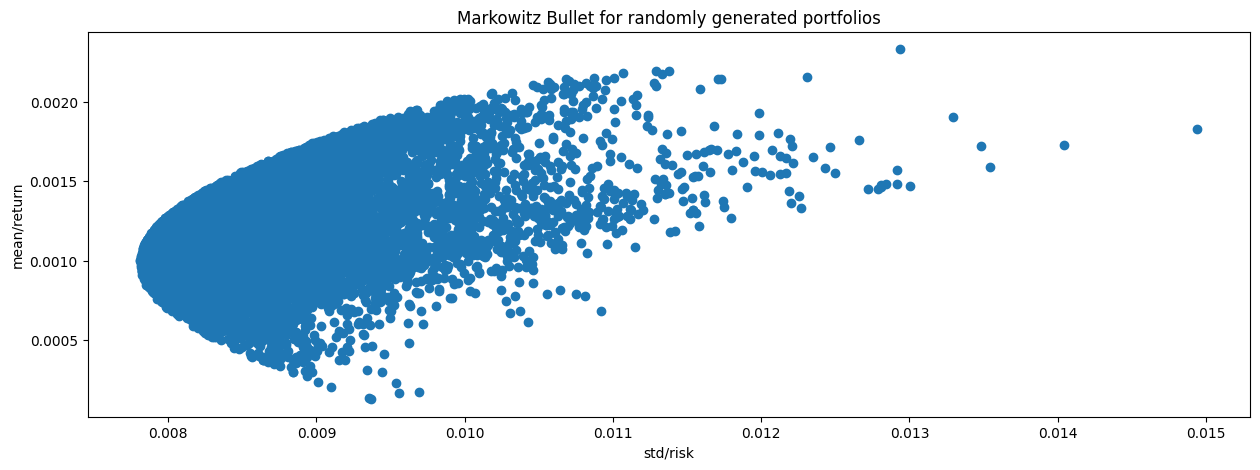

In [ ]:
plt.figure(figsize=(15,5))
plt.scatter(sigmas, mus)
plt.xlabel('std/risk')
plt.ylabel('mean/return')
plt.title('Markowitz Bullet for randomly generated portfolios')
plt.show()

### Efficient frontier - Maximise return for given risk

In [ ]:
mu= np.array(mu)
n_assets = len(tickers)
w = cp.Variable(n_assets)
target_sigma = cp.Parameter(nonneg=True)

mu1 = mu @ w  # expected return
objective = cp.Maximize(mu1)
constraints = [cp.sum(w) == 1, cp.quad_form(w, c) <= target_sigma**2]

frontier_weights = []
frontier_returns = []

# chosen_sigmas = random.choices(sigmas, k=2)
# print(chosen_sigmas)

for sigma in sigmas:
    target_sigma.value = sigma
    problem = cp.Problem(objective, constraints)
    try:
        problem.solve(solver=cp.ECOS)
        if problem.status == 'optimal':
            frontier_weights.append(w.value)
            frontier_returns.append(mu1.value)
    except:
        continue

/usr/local/lib/python3.10/dist-packages/cvxpy/reductions/solvers/solving_chain.py:213: UserWarning: You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Discplined Parametrized Programming, at
	https://www.cvxpy.org/tutorial/advanced/index.html#disciplined-parametrized-programming
  warnings.warn(dpp_error_msg)


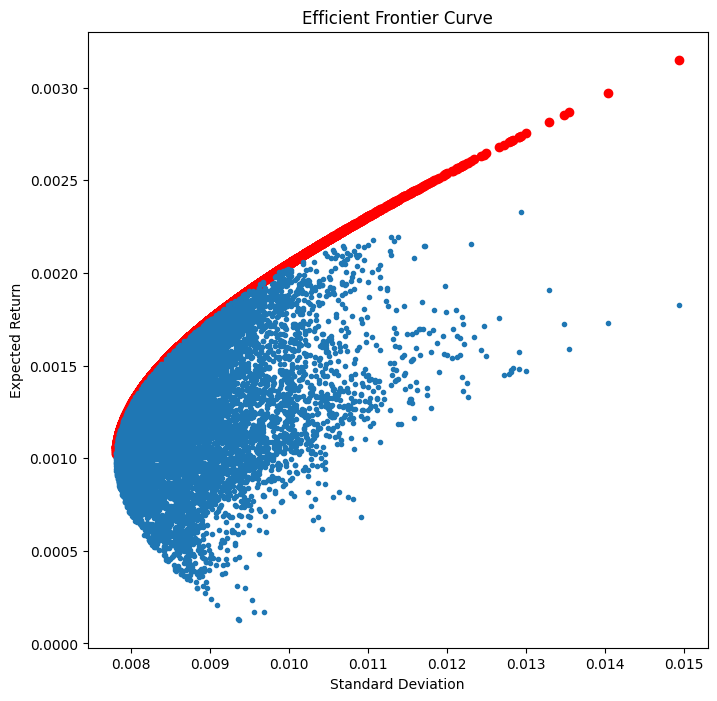

In [ ]:
#plot
plt.subplots(figsize=(8,8))
plt.scatter(sigmas, frontier_returns,c='r')
plt.plot(sigmas, mus, '.')
plt.title('Efficient Frontier Curve')
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')
plt.show()

In [ ]:
len(frontier_returns)

10000

### CAPM - CML

In [ ]:
data={'Returns':frontier_returns,'Volatility':sigmas}  # returns and standard deviation for 1000 portfolios
portfolios_V1=pd.DataFrame(data)
print(portfolios_V1.shape)
portfolios_V1.head()

(10000, 2)


,Returns,Volatility
0,0.001734,0.008957
1,0.001270,0.007983
2,0.001460,0.008288
3,0.001519,0.008411
4,0.001799,0.009152


In [ ]:
rf=0.00074   # return of risk free asset
optimal_risky_port= portfolios_V1.iloc[((portfolios_V1['Returns']-rf)/portfolios_V1['Volatility']).idxmax()]  ## point for which slope(Sharpe ratio) is maximum
print(optimal_risky_port)

Returns       0.003151
Volatility    0.014941
Name: 663, dtype: float64


Slope of Capital Market Line is : 0.16135121117445136


Text(0.5, 1.0, 'Capital Asset Pricing Model')

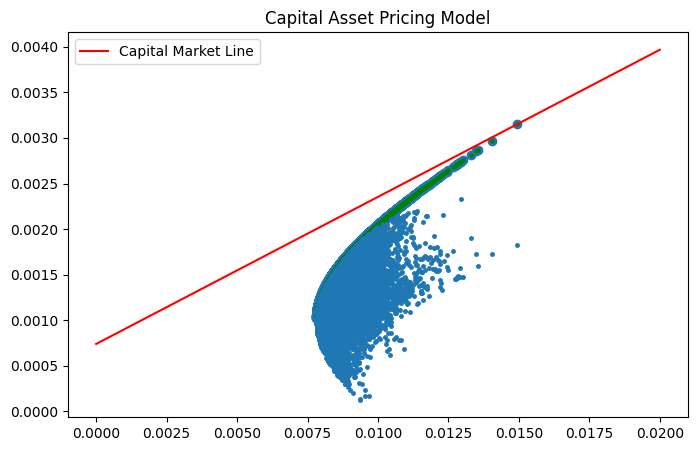

In [ ]:
plt.subplots(figsize=(8,5))
plt.scatter(portfolios_V1['Volatility'], portfolios_V1['Returns'])

x_cml = np.linspace(0, 0.02, 100)
slope = (optimal_risky_port[0] - rf) / optimal_risky_port[1]
y_cml = rf + slope * x_cml
plt.plot(x_cml, y_cml, color='red', label='Capital Market Line')
plt.scatter(sigmas, frontier_returns,c='g', s=5)

# plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='y',marker='*',s=500)

plt.plot(sigmas, mus, '.', markersize=5)
slope=(optimal_risky_port[0]-rf)/optimal_risky_port[1]
# title="Slope of line :  "+str(slope)
print("Slope of Capital Market Line is :",slope)
plt.legend()


plt.title('Capital Asset Pricing Model')

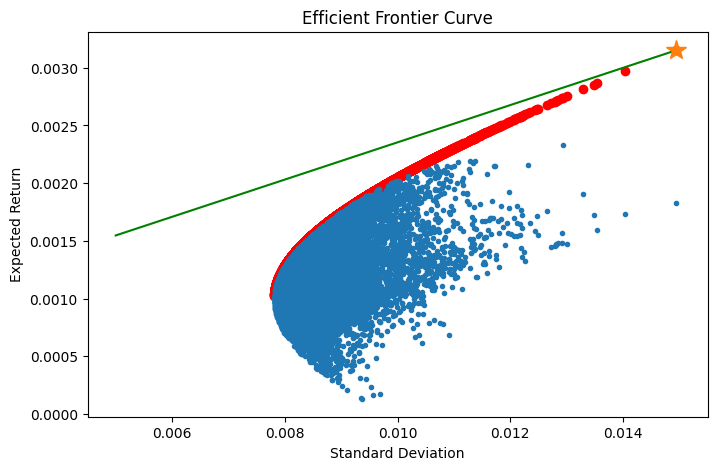

In [ ]:
plt.subplots(figsize=(8,5))
plt.scatter(sigmas, frontier_returns,c='r')
plt.plot(sigmas, mus, '.')

x_cml = np.linspace(0.005, 0.015, 100)
slope = (optimal_risky_port[0] - rf) / optimal_risky_port[1]
y_cml = rf + slope * x_cml
plt.plot(x_cml, y_cml, color='green', label='Capital Market Line')

plt.plot(optimal_risky_port[1], optimal_risky_port[0],'*', markersize=15)

plt.title('Efficient Frontier Curve')
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')
plt.show()

### SML

In [ ]:
n_assets = 3
new_df_returns = returns.iloc[:, :n_assets]              # we take first 3 assets
new_cov_matrix = new_df_returns.cov()
new_M = new_df_returns.mean()
new_target_returns = np.linspace(new_M.min(), new_M.max(), num=50)
new_C = new_df_returns.cov()
new_C_inv = np.linalg.inv(new_C)
new_Ones = np.array([1] * n_assets)
eK = np.array([0] * n_assets)

new_W = new_C_inv @ (new_M.T - rf*new_Ones.T)
new_k = new_Ones @ new_W
new_W /= new_k

mu_M = new_M @ new_W

# calculating beta for 3 securities :
Betas = []
for i in range(n_assets):
    below = new_W.T @ new_C @ new_W
    eK = np.array([0] * n_assets)
    eK[i] += 1
    upper = new_W.T @ new_C @ eK
    Betas.append(upper/below)

Betas

[0.23394406090169262, 0.14729306333999276, -0.11289321459092025]

In [ ]:
#slope of Security market line
slope = mu_M - rf
print(slope)

0.0072798928485194375


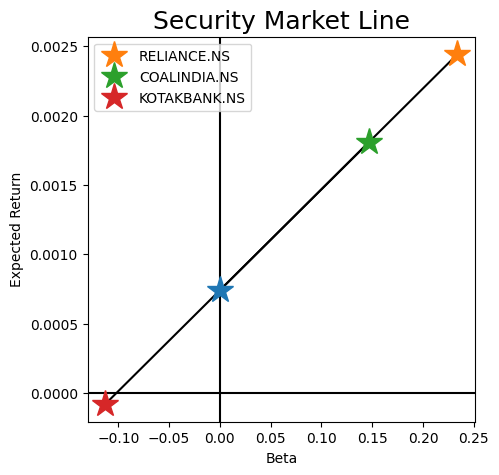

In [ ]:
point1 = [0, rf]
point2 = [Betas[0], slope*Betas[0] + rf]
point3 = [Betas[1], slope*Betas[1] + rf]
point4 = [Betas[2], slope*Betas[2] + rf]

x_values1 = [point1[0], point2[0]]
y_values1 = [point1[1], point2[1]]

x_values2 = [point1[0], point3[0]]
y_values2 = [point1[1], point3[1]]

x_values3 = [point1[0], point4[0]]
y_values3 = [point1[1], point4[1]]

plt.figure(figsize=(5,5))
plt.title('Security Market Line', fontsize=18)
# plt.plot(x_values1, y_values1, 'blue', linestyle="-", linewidth=2, label = tickers[0])
# plt.text(point2[0] - 0.025, point2[1] + 0.0001, "(β1, E(R1))")

# plt.plot(x_values2, y_values2, 'red', linestyle="-", linewidth=3, label = tickers[1])
# plt.text(point3[0] - 0.12, point3[1] - 0.0002, "(β2, E(R2))")

# plt.plot(x_values3, y_values3, 'green', linestyle="-", linewidth=5, label = tickers[2])
# plt.text(point1[0], point1[1] - 0.0002, "(0, µ_rf)")
# plt.text(point4[0] + 0.01, point4[1]-0.0002, "(β3, E(R3))")

plt.axvline(x=0, c="black")
plt.axhline(y=0, c="black")
plt.plot(x_values1, y_values1, 'black')
plt.plot(x_values2, y_values2, 'black')
plt.plot(x_values3, y_values3, 'black')

plt.plot(point1[0], point1[1], '*', markersize=20)
plt.plot(point2[0], point2[1], '*', markersize=20, label = tickers[0])
plt.plot(point3[0], point3[1], '*', markersize=20, label = tickers[1])
plt.plot(point4[0], point4[1], '*', markersize=20, label = tickers[2])

# plt.plot([Betas[0], Betas[0]], [0, point2[1]], 'blue', linestyle = "--", linewidth=2, alpha=0.4)
# plt.plot([Betas[1], Betas[1]], [0, point3[1]], 'red', linestyle = "--", linewidth=2, alpha=0.4)
# plt.plot([Betas[2], Betas[2]], [0, point4[1]], 'green', linestyle = "--", linewidth=2, alpha=0.4)

# plt.plot([0, Betas[0]], [point2[1], point2[1]], 'blue', linestyle = "--", linewidth=2, alpha=0.4)
# plt.plot([0, Betas[1]], [point3[1], point3[1]], 'red', linestyle = "--", linewidth=2, alpha=0.4)
# plt.plot([0, Betas[2]], [point4[1], point4[1]], 'green', linestyle = "--", linewidth=2, alpha=0.4)

plt.legend()
plt.xlabel('Beta')
plt.ylabel('Expected Return')
plt.show()

### Ratios

In [ ]:
from scipy.stats import skew, kurtosis

In [ ]:
def calculate_sortino_ratio(returns, risk_free_rate, target_return=0.0):
    excess_return = returns - risk_free_rate
    downside_return = returns[returns < target_return]
    downside_deviation = np.std(downside_return)
    return np.mean(excess_return) / downside_deviation

def calculate_treynor_ratio(returns, risk_free_rate, beta):
    return (np.mean(returns) - risk_free_rate) / beta

def calculate_expected_shortfall(returns, confidence_level=0.05):
    return -np.mean(sorted(returns)[:int(len(returns) * confidence_level)])

In [66]:
sharpe_ratio = optimal_risky_port[0]/optimal_risky_port[1]
sortino_ratio = calculate_sortino_ratio(mu.dot(frontier_weights[0]), rf / 252)
treynor_ratio = calculate_treynor_ratio(mu_M, rf, Beta[0])

print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Sortino Ratio: {sortino_ratio:.2f}")
print(f"Treynor Ratio: {treynor_ratio:.2f}")

Sharpe Ratio: 2.21
Sortino Ratio: 2.1
Treynor Ratio: 0.73


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
